In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import scipy.signal as ss


In [13]:
### Part 1: Create a grid representing world map (style A) with only white/navy squares included ###

# SETUP
num_blocks_r = 5
num_blocks_c  = 8
num_squares_in_block = 16

rows = num_blocks_r * num_squares_in_block # num of rows (squares unit) in world map
cols = num_blocks_c * num_squares_in_block # num of rows (squares unit) in world map
grid = np.zeros((rows, cols))

In [44]:
block_paths = glob.glob('blocks/*')
block_paths.sort() # sorts paths from (0,0), (0,1), ... -> ..., (4,6), (4,7) 

square_paths = glob.glob('squares/*')
square_paths.sort() # sorts paths from 1, 2, .. ->  9
squares = []
for sq_path in square_paths:
    sq = cv2.imread(sq_path, cv2.IMREAD_COLOR)
    curr_sq= cv2.cvtColor(sq, cv2.COLOR_BGR2RGB)
    # squares.append(sq)
    # squares.append(sum(sum(sum(sq)))/ (len(sq)*len(sq[0])))
    squares.append(np.median(sq.ravel()))

    

In [39]:
def best_square(source):
    best_val = np.Inf
    best_index = 0
    # sq_val = sum(sum(sum(source)))/(len(source)*len(source[0]))
    # sq_val = np.median(source.ravel())
    # print("s val:", sq_val)
    for i in range(len(squares)):
        # val = np.sum(np.sum((source - squares[i]))**2)
        # val = abs(sq_val - squares[i])
        val = ss.correlate(source, )
        print("val:", val)
        if val < best_val:
            best_val = val
            best_index = i + 1
    return best_index

squares: [255.0, 96.0, 17.0, 18.0, 27.0, 4.0, 17.0, 133.0, 10.0, 36.0]


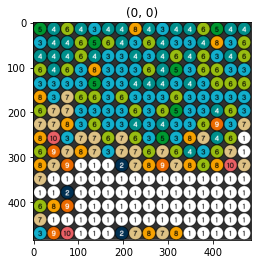

s val: 48.0
val: 207.0
val: 48.0
val: 31.0
val: 30.0
val: 21.0
val: 44.0
val: 31.0
val: 85.0
val: 38.0
val: 12.0


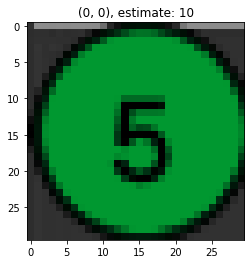

s val: 54.0
val: 201.0
val: 42.0
val: 37.0
val: 36.0
val: 27.0
val: 50.0
val: 37.0
val: 79.0
val: 44.0
val: 18.0


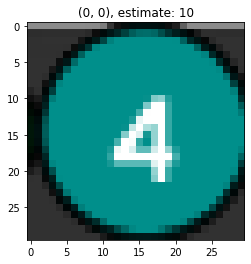

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


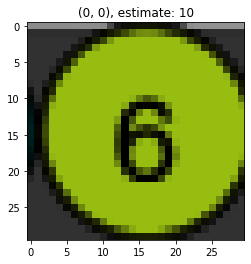

s val: 56.5
val: 198.5
val: 39.5
val: 39.5
val: 38.5
val: 29.5
val: 52.5
val: 39.5
val: 76.5
val: 46.5
val: 20.5


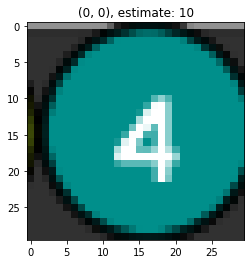

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


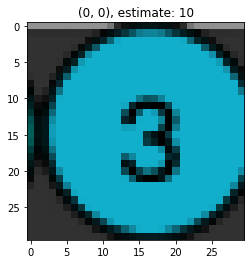

s val: 54.0
val: 201.0
val: 42.0
val: 37.0
val: 36.0
val: 27.0
val: 50.0
val: 37.0
val: 79.0
val: 44.0
val: 18.0


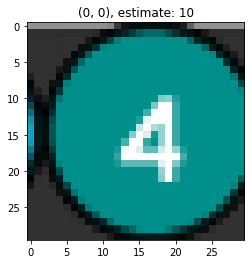

s val: 56.0
val: 199.0
val: 40.0
val: 39.0
val: 38.0
val: 29.0
val: 52.0
val: 39.0
val: 77.0
val: 46.0
val: 20.0


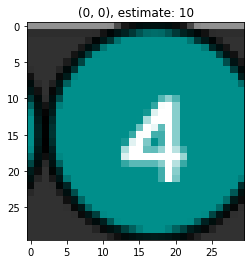

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


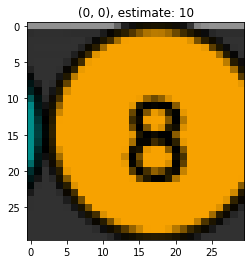

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


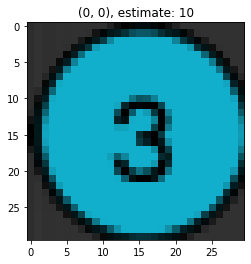

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


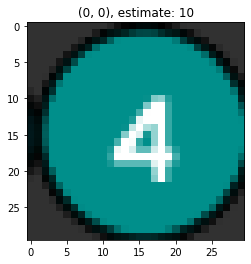

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


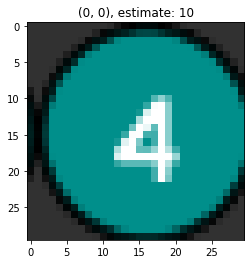

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


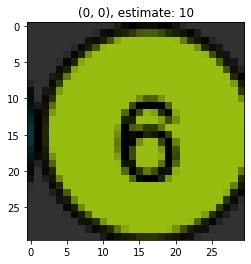

s val: 48.0
val: 207.0
val: 48.0
val: 31.0
val: 30.0
val: 21.0
val: 44.0
val: 31.0
val: 85.0
val: 38.0
val: 12.0


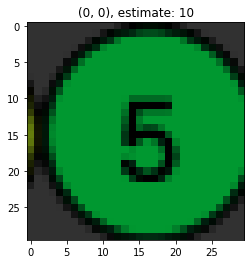

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


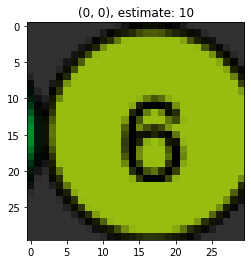

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


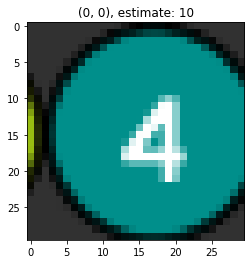

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


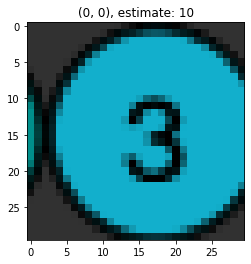

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


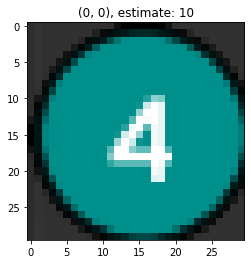

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


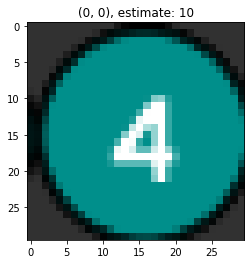

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


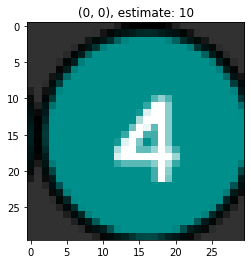

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


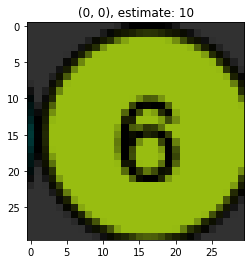

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


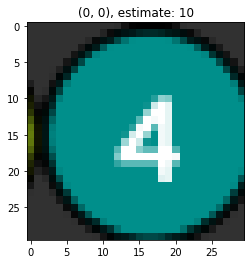

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


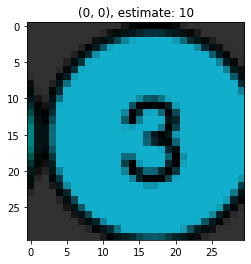

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


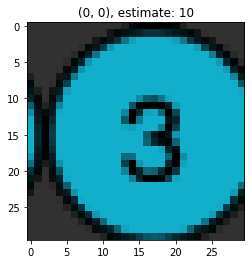

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


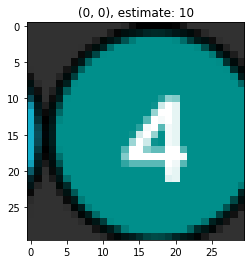

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


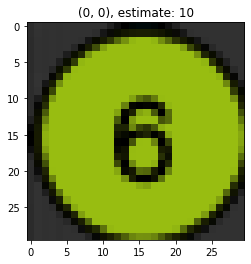

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


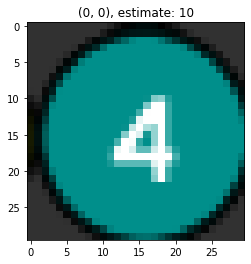

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


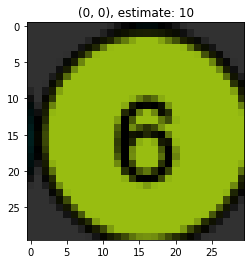

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


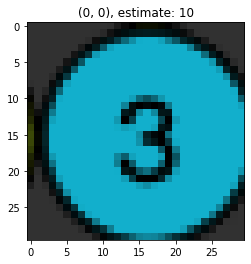

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


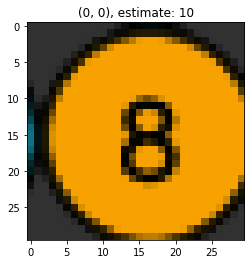

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


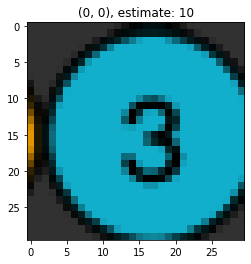

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


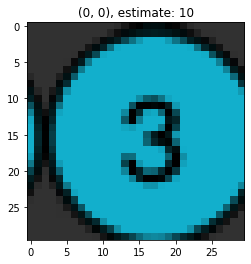

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


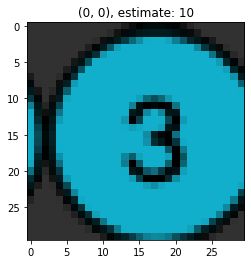

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


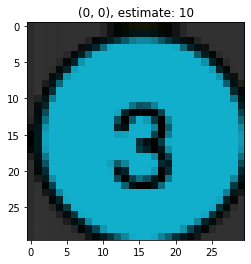

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


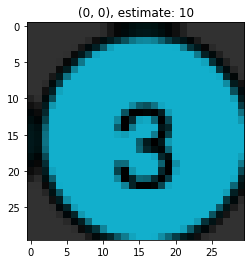

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


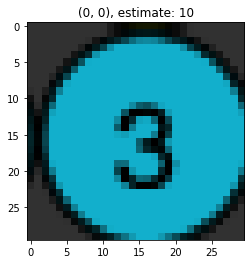

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


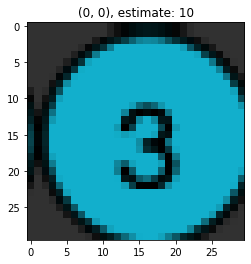

s val: 48.0
val: 207.0
val: 48.0
val: 31.0
val: 30.0
val: 21.0
val: 44.0
val: 31.0
val: 85.0
val: 38.0
val: 12.0


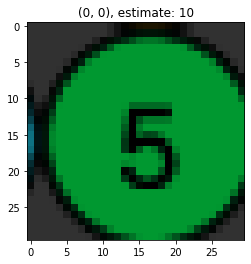

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


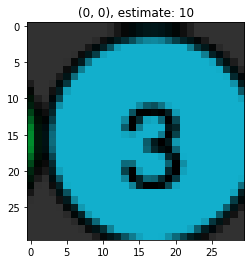

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


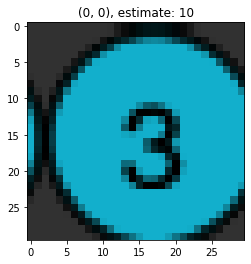

s val: 49.0
val: 206.0
val: 47.0
val: 32.0
val: 31.0
val: 22.0
val: 45.0
val: 32.0
val: 84.0
val: 39.0
val: 13.0


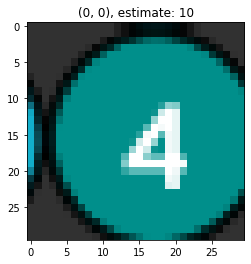

In [43]:
print("squares:", squares)

for (i, b_path) in enumerate(block_paths):
    r_index = i // 8
    c_index = i % 8
    curr_block = cv2.imread(b_path, cv2.IMREAD_COLOR)
    curr_block = cv2.cvtColor(curr_block, cv2.COLOR_BGR2RGB)
    plt.imshow(curr_block)
    plt.title("({}, {})".format(r_index, c_index))
    plt.show()
    for r in range(num_blocks_r):
        for c in range(num_blocks_c):
            num_pixels = 30
            curr_square = curr_block[num_pixels * r : num_pixels * (r + 1), num_pixels * c : num_pixels * (c + 1), :]
            square_estimate = best_square(curr_square)
            plt.imshow(curr_square)
            plt.title("({}, {}), estimate: {}".format(r_index, c_index, square_estimate))
            plt.show()
    break
    

In [ ]:
### Part 2: Create ways to view the grid, block by block and the whole map ###

In [ ]:
### Part 3: Style the empty parts of the map with the remaining squares (detailed in map uilding guide) ###
